# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [43]:
df = pd.read_csv("weight-height.csv")
print (df.describe())
print (df.head())
data = pd.read_csv("weight-height.csv")
male_df = df.loc[data["Gender"] == 'Male']
female_df =  df.loc[data["Gender"] == 'Female']

print (female_df.Height.mean())
print (female_df.Weight.std())
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
63.708773603424916
19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/home/ghost/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


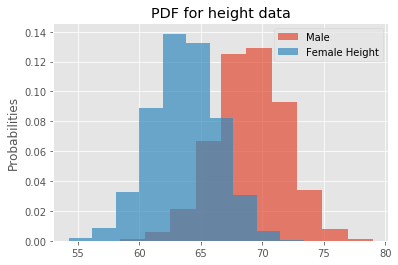

In [53]:
male_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Male')
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Female Height');
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

# Record your observations - are these inline with your personal observations?
The average male height isg reater than the average female height.
Average male height ~69
Average female height ~63


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

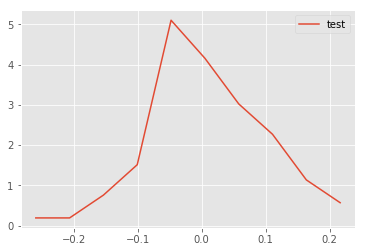

In [72]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    n, bins
    pdfy = np.zeros(n.size)
    pdfx = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

# plot the calculated curve
    return (pdfx, pdfy)



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

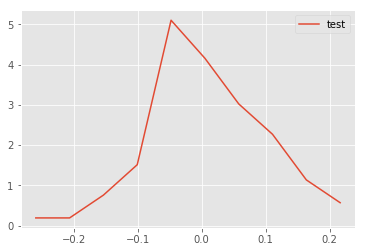

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

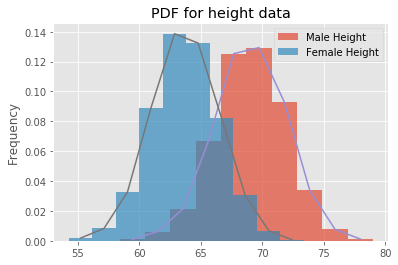

In [85]:
male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x, y = density(female_df.Height)
plt.plot(x, y)
plt.title ('PDF for height data')
plt.show()

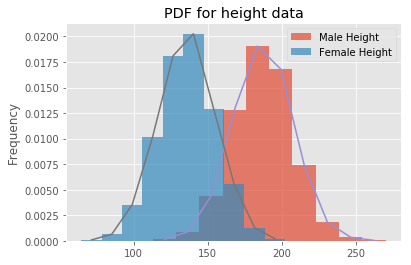

#### Repeat above exerice for male and female weights

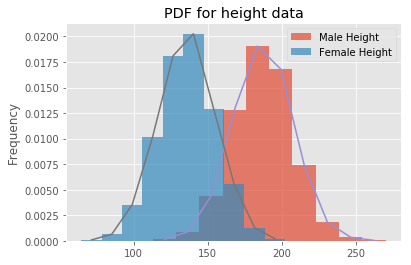

In [89]:
# Your code here 
male_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
female_df.Weight.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x, y = density(female_df.Weight)
plt.plot(x, y)
plt.title ('PDF for height data')
plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

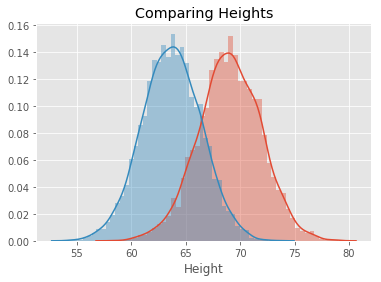

In [93]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

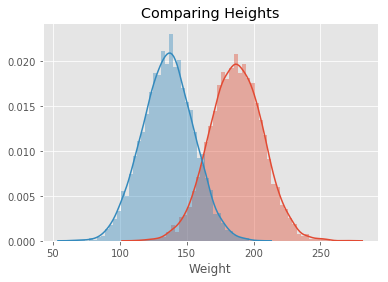

In [94]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')
plt.show()

Text(0.5,1,'Comparing Weights')

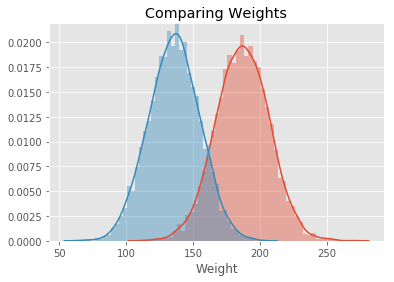

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.